# Session 5 Random Forrests 

This week we will finish off the intro to machine learning and forecasting course by looking at Random Forests. Random Forests are essentially super decision trees. Random forests work by taking an ensemble of decision trees, aggregating them, and using that to create a more accurate decision tree. Rather than pruning individual trees to stop over and under fitting, the aggregate tree, by being an aggregate, should provide us with better accuracy than a given individual pruned tree. Again, the google developers course is good on this, and it’s worth reading to understand what’s going on: Random Forest  |  Machine Learning  |  Google for Developers


We are addong encoded catagoricals 


we did condos instal for grahp viz if some of the bimnarys are in python but not in codespace this does it

In [1]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

th While  desition tree takes data and builds all the trees it can, the random forest runs lots of trees and builds and omsoble . this is not the best three but a sort of combination ---- See the Google Page 

In [2]:
cin = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/D2I-Jupyter-Notebook-Tools/refs/heads/main/ml-data%20science%20tutorials/data/CINdetails.csv')
characteristics = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/D2I-Jupyter-Notebook-Tools/refs/heads/main/ml-data%20science%20tutorials/data/ChildCharacteristics.csv')
identifiers = pd.read_csv('https://raw.githubusercontent.com/data-to-insight/D2I-Jupyter-Notebook-Tools/refs/heads/main/ml-data%20science%20tutorials/data/ChildIdentifiers.csv')

identifiers

,Unnamed: 0,LAchildID,UPN,FormerUPN,UPNunknown,PersonBirthDate,ExpectedPersonBirthDate,GenderCurrent,PersonDeathDate
0,0,RND000215205141,A850728973744,NaN,NaN,2019-12-06,NaN,1,NaN
1,1,RND000824303014,A141396438491,NaN,NaN,2011-04-27,NaN,9,NaN
2,2,RND000750143123,A929946861554,NaN,NaN,2017-06-06,NaN,1,NaN
3,3,RND000909164501,A612330267292,NaN,NaN,2014-10-03,NaN,0,NaN
4,4,RND000382171815,A604459366806,NaN,NaN,2019-09-25,NaN,2,NaN
...,...,...,...,...,...,...,...,...,...
327,327,RND000112711501,A465246916125,NaN,NaN,2010-07-07,NaN,2,NaN
328,328,RND000513120794,A540014111973,NaN,NaN,2018-08-14,NaN,2,NaN
329,329,RND000541643134,A549582689058,NaN,NaN,2021-12-09,NaN,1,NaN
330,330,RND000404939452,A889492349196,NaN,NaN,2013-07-23,NaN,2,NaN


In [3]:
print(cin.info())
print(identifiers.info())
print(characteristics.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        101 non-null    int64 
 1   LAchildID         101 non-null    object
 2   CINdetailsID      101 non-null    int64 
 3   CINreferralDate   101 non-null    object
 4   ReferralSource    101 non-null    object
 5   PrimaryNeedCode   101 non-null    object
 6   CINclosureDate    63 non-null     object
 7   ReasonForClosure  63 non-null     object
 8   DateOfInitialCPC  85 non-null     object
 9   ReferralNFA       101 non-null    bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 7.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               332 non-null    int64  
 1   LAchildI

In [4]:
#make sure we alkways have the most recent cin referal 
cin.sort_values('LAchildID', inplace=True, ascending=False)

# check we have one row per child
cin.drop_duplicates('LAchildID', inplace=True)

# This will always keep the most recent (top) row if there are duplicates 

cin['CINplan'] = 1

cin


,Unnamed: 0,LAchildID,CINdetailsID,CINreferralDate,ReferralSource,PrimaryNeedCode,CINclosureDate,ReasonForClosure,DateOfInitialCPC,ReferralNFA,CINplan
80,80,RND000989010565,1,08/11/2018,1B,N3,NaN,NaN,17/11/2018,False,1
34,34,RND000982548153,1,13/05/2020,10,N4,27/07/2020,RC7,19/07/2020,False,1
74,74,RND000964729912,1,08/05/2020,4,N2,12/07/2020,RC3,10/06/2020,False,1
23,23,RND000958425881,1,18/03/2012,2B,N7,26/07/2012,RC4,07/05/2012,False,1
93,93,RND000923778427,1,12/10/2014,1D,N7,21/11/2016,RC4,21/10/2014,False,1
...,...,...,...,...,...,...,...,...,...,...,...
21,21,RND000017573879,1,23/01/2022,3C,N3,NaN,NaN,30/03/2022,False,1
25,25,RND000008856809,1,27/09/2017,5B,N9,26/03/2018,RC4,19/12/2017,False,1
57,57,RND000007041479,1,21/12/2020,3E,N8,NaN,NaN,05/03/2021,False,1
73,73,RND000004927037,1,06/01/2019,1B,N0,14/05/2020,RC2,11/02/2019,False,1


In [5]:
# Lets merge our dataframe togethert (this is another way to merge)

# This is effectivlet left.merge(right)
df = characteristics.merge(identifiers)
df = df.merge(cin, how='left', on='LAchildID')
df

,Unnamed: 0_x,LAchildID,Ethnicity,UPN,FormerUPN,UPNunknown,PersonBirthDate,ExpectedPersonBirthDate,GenderCurrent,PersonDeathDate,Unnamed: 0_y,CINdetailsID,CINreferralDate,ReferralSource,PrimaryNeedCode,CINclosureDate,ReasonForClosure,DateOfInitialCPC,ReferralNFA,CINplan
0,0,RND000215205141,WIRT,A850728973744,NaN,NaN,2019-12-06,NaN,1,NaN,0.0,1.0,13/07/2020,4,N6,11/06/2021,RC2,29/09/2020,False,1.0
1,1,RND000824303014,WROM,A141396438491,NaN,NaN,2011-04-27,NaN,9,NaN,2.0,2.0,22/10/2017,3A,N9,NaN,NaN,05/11/2017,False,1.0
2,2,RND000750143123,AOTH,A929946861554,NaN,NaN,2017-06-06,NaN,1,NaN,4.0,2.0,07/02/2022,9,N9,NaN,NaN,01/05/2022,False,1.0
3,3,RND000909164501,MWBC,A612330267292,NaN,NaN,2014-10-03,NaN,0,NaN,5.0,1.0,13/04/2016,2B,N3,26/09/2020,RC1,16/04/2016,False,1.0
4,4,RND000382171815,APKN,A604459366806,NaN,NaN,2019-09-25,NaN,2,NaN,6.0,1.0,02/04/2021,2A,N3,23/06/2021,RC3,02/04/2021,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,327,RND000112711501,WOTH,A465246916125,NaN,NaN,2010-07-07,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,328,RND000513120794,WROM,A540014111973,NaN,NaN,2018-08-14,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,329,RND000541643134,BCRB,A549582689058,NaN,NaN,2021-12-09,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
330,330,RND000404939452,AIND,A889492349196,NaN,NaN,2013-07-23,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# lets select the variables we want

# calulating ages 

df['Age'] = pd.to_datetime('today') - pd.to_datetime(df['PersonBirthDate'], format='%Y-%m-%d')
 
df['Age'] = df['Age']/pd.Timedelta(days=365)
 
cols_to_keep = ['Age', 'Ethnicity', 'GenderCurrent', 'CINplan']
 
df = df[cols_to_keep]
 
df



,Age,Ethnicity,GenderCurrent,CINplan
0,4.834388,WIRT,1,1.0
1,13.450827,WROM,9,1.0
2,7.335758,AOTH,1,1.0
3,10.012471,MWBC,0,1.0
4,5.031649,APKN,2,1.0
...,...,...,...,...
327,14.256306,WOTH,2,NaN
328,6.146717,WROM,2,NaN
329,2.823429,BCRB,1,NaN
330,11.209731,AIND,2,NaN


In [7]:
# Fill in the NA's
df['CINplan'] = df['CINplan'].fillna(0)
 
df

/tmp/ipykernel_33461/1155811652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CINplan'] = df['CINplan'].fillna(0)


,Age,Ethnicity,GenderCurrent,CINplan
0,4.834388,WIRT,1,1.0
1,13.450827,WROM,9,1.0
2,7.335758,AOTH,1,1.0
3,10.012471,MWBC,0,1.0
4,5.031649,APKN,2,1.0
...,...,...,...,...
327,14.256306,WOTH,2,0.0
328,6.146717,WROM,2,0.0
329,2.823429,BCRB,1,0.0
330,11.209731,AIND,2,0.0


In [8]:
# Lets 
gender_dict = {
    1:'male',
    2:'female',
    0:'other',
    9:'other'
}

# we want to map the dictionary values on the gender column 
# This will replace the values with the labels 
df['GenderCurrent'] = df['GenderCurrent'].map(gender_dict)

/tmp/ipykernel_33461/3516776337.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['GenderCurrent'] = df['GenderCurrent'].map(gender_dict)


In [9]:
# Change sub groups into ...  for ethnicity 
# we will do this with a function

def ethnic_check(row):
    letter = row[0] 
    if letter == 'W':
        return 'white'
    if letter == 'B':
        return 'black'
    if (letter == 'A') | (letter == 'C'):
        return 'asian'
    if letter == 'M':
        return 'mixed'
    else:
        return 'other'



df['Ethnicity'] = df['Ethnicity'].apply(ethnic_check)
df

/tmp/ipykernel_33461/1407507368.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ethnicity'] = df['Ethnicity'].apply(ethnic_check)


,Age,Ethnicity,GenderCurrent,CINplan
0,4.834388,white,male,1.0
1,13.450827,white,other,1.0
2,7.335758,asian,male,1.0
3,10.012471,mixed,other,1.0
4,5.031649,asian,female,1.0
...,...,...,...,...
327,14.256306,white,female,0.0
328,6.146717,white,female,0.0
329,2.823429,black,male,0.0
330,11.209731,asian,female,0.0


In [10]:
# we cant use catagoricals o we need to turn the ethnicity column into a series of binary columns 
# this process is called encoding  (we can do it in pandas)

df_encoded = pd.get_dummies(df[['GenderCurrent', 'Ethnicity']]) # transpose these coluns to seperate columns 

full_df = df[['CINplan', 'Age']].merge(df_encoded, how='left', left_index=True, right_index=True)
full_df


,CINplan,Age,GenderCurrent_female,GenderCurrent_male,GenderCurrent_other,Ethnicity_asian,Ethnicity_black,Ethnicity_mixed,Ethnicity_other,Ethnicity_white
0,1.0,4.834388,False,True,False,False,False,False,False,True
1,1.0,13.450827,False,False,True,False,False,False,False,True
2,1.0,7.335758,False,True,False,True,False,False,False,False
3,1.0,10.012471,False,False,True,False,False,True,False,False
4,1.0,5.031649,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
327,0.0,14.256306,True,False,False,False,False,False,False,True
328,0.0,6.146717,True,False,False,False,False,False,False,True
329,0.0,2.823429,False,True,False,False,True,False,False,False
330,0.0,11.209731,True,False,False,True,False,False,False,False


# Machine Learning Bit 
split data into freatures and label
split data into train and test 
instatiatie object for model 
fit model 
mak predictions 
check accuracy 


In [11]:
# split data into features and label
X = full_df.drop('CINplan', axis=1)
y = full_df['CINplan']
 
# split data into train/test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
 
# instantiate object for model
rf = RandomForestClassifier()
 
# fit model
rf.fit(X_train, y_train)
 
# make predictions
y_pred = rf.predict(X_test)
 
# check accuracy
print(accuracy_score(y_test, y_pred))


0.6417910447761194


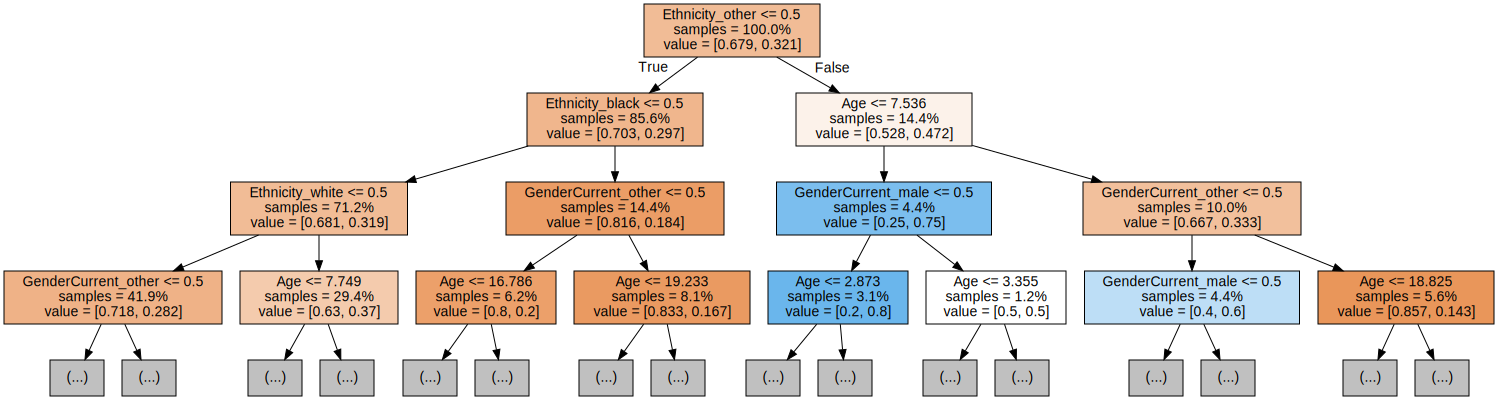

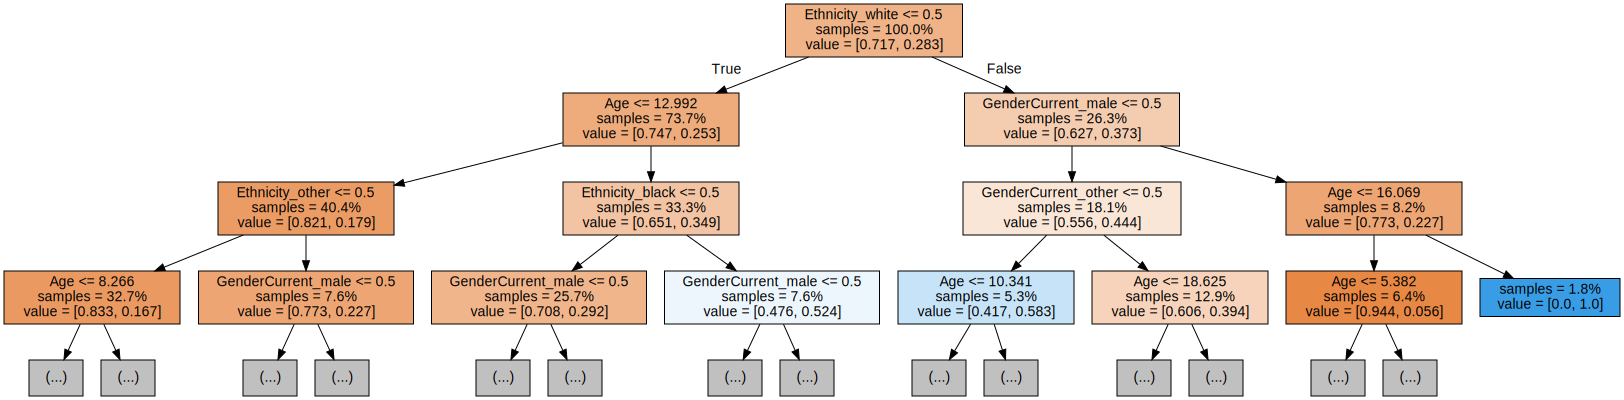

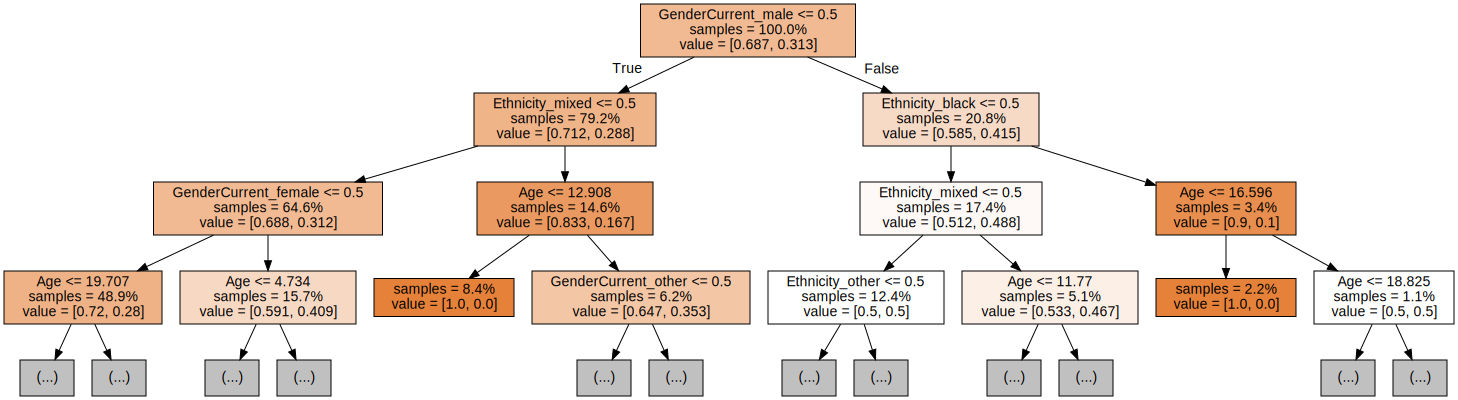

In [12]:
# we cn print each indiviidul decision tree tht went into the random forest 
# her the loop will print us the first 3 (there are thousands so dont printv all)

for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,     # get the data ot of sckit learn and into a graph (export as binary data so teh graph can read)
                               feature_names=X_train.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [16]:
# Feature tuning 


param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=10, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'n_estimators': 431}


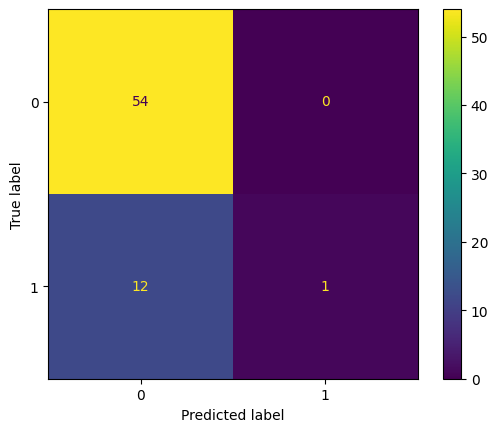

In [17]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()

<Axes: xlabel='feature'>

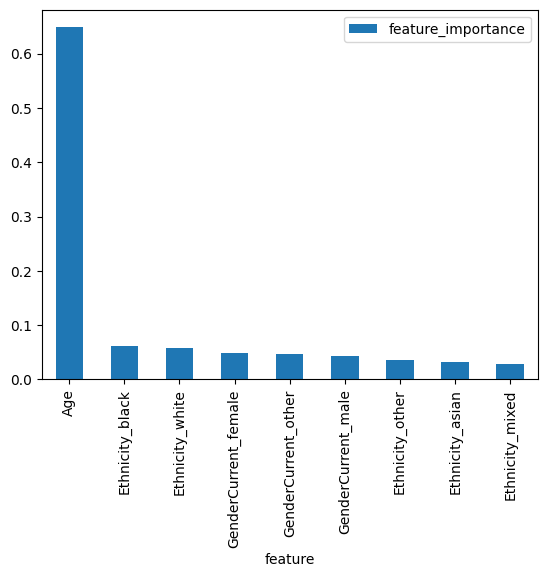

In [21]:
feature_importance_df = pd.DataFrame.from_dict({'feature_importance': best_rf.feature_importances_,
                                                'feature': X_train.columns})\
        .set_index('feature').sort_values('feature_importance', ascending = False)

feature_importance_df.plot.bar()